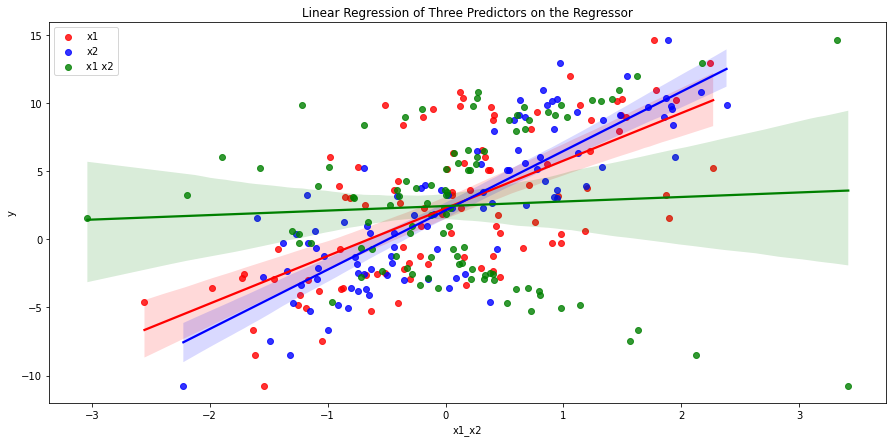

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='x1', y='y', data=df, ax=ax, color='red', label='x1')
sns.regplot(x='x2', y='y', data=df, ax=ax, color='blue', label='x2')
sns.regplot(x='x1_x2', y='y', data=df, ax=ax, color='green', label='x1 x2')

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

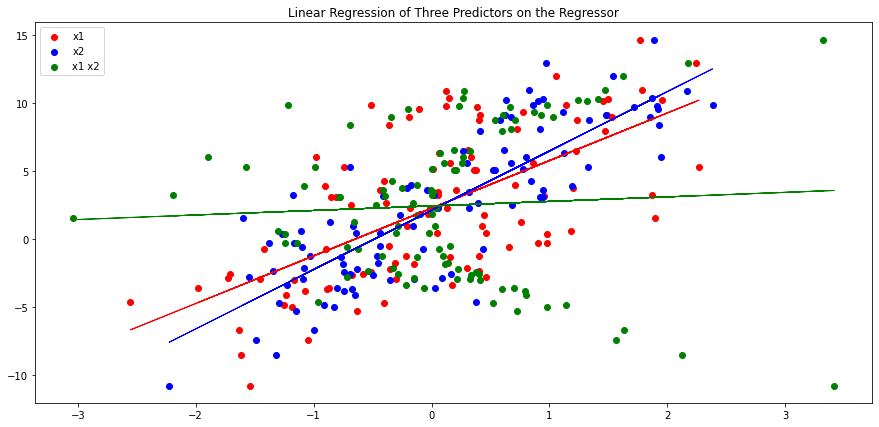

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))

# regression 1: x1 on y
x1 = sm.add_constant(df['x1'])
model = sm.OLS(df['y'], x1).fit()
pred = model.predict(x1)
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth=1)

# regression 2: x2 on y
x2 = sm.add_constant(df['x2'])
model = sm.OLS(df['y'], x2).fit()
pred = model.predict(x2)
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth=1)

# regression 3: x1_x2 on y
x1_x2 = sm.add_constant(df['x1_x2'])
model = sm.OLS(df['y'], x1_x2).fit()
pred = model.predict(x1_x2)
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth=1)

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

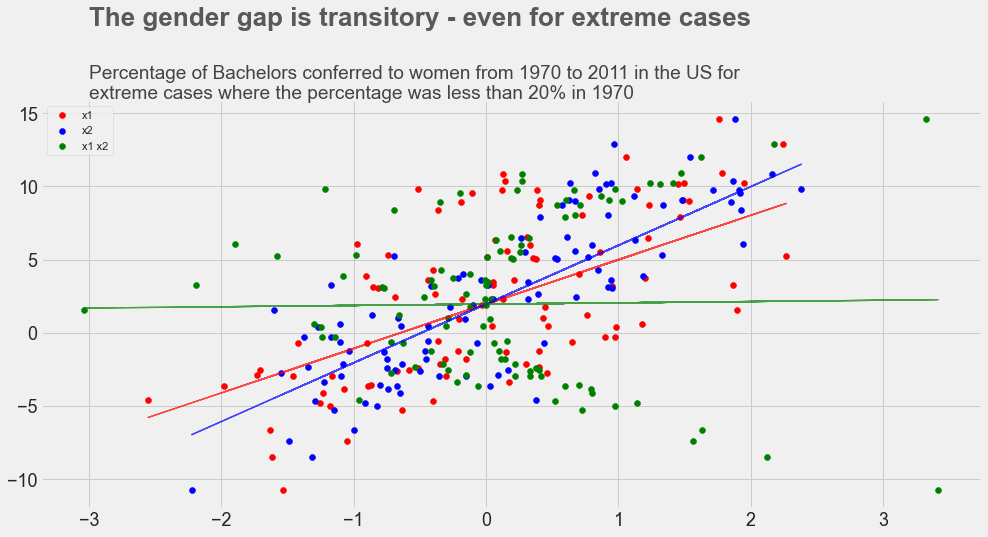

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.style as style
style.use('fivethirtyeight')

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the multivariate regression
x = sm.add_constant(df[['x1', 'x2', 'x1_x2']])
model = sm.OLS(df['y'], x).fit()

# plot the three relationships
fig, ax = plt.subplots(figsize=(15, 7))

# relationship 1: x1 on y
pred = model.params[0] + model.params[1] * df['x1']
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth = 1.3, alpha = .7)

# relationship 2: x2 on y
pred = model.params[0] + model.params[2] * df['x2']
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth = 1.3, alpha = .7)

# relationship 3: x1_x2 on y
pred = model.params[0] + model.params[3] * df['x1_x2']
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth = 1.3, alpha = .7)

# add the legend and title
ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.text(x =-3, y = 21, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -3, y = 16,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)
plt.show()

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'random_forest',
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])
    }
])

def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'xgboost',
        'learning_rate': hp.loguniform('learning_rate', -5, 0),
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform('subsample', 0.1, 1),
        'gamma': hp.uniform('gamma', 0, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
        'reg_lambda': hp.uniform('reg_lambda', 0, 1),
        'reg_alpha': hp.uniform('reg_alpha', 0, 1)
    }
])

def objective(params):
    model = xgb.XGBRegressor(
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        gamma=params['gamma'],
        colsample_bytree=params['colsample_bytree'],
        reg_lambda=params['reg_lambda'],
        reg_alpha=params['reg_alpha'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.suggest, max_evals=100, verbose=1)

In [ ]:
# Perform t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Degrees of freedom
dof = len(sample1) + len(sample2) - 2

# Calculate standard error
se = np.sqrt(np.var(sample1) / len(sample1) + np.var(sample2) / len(sample2))

# Calculate t critical value
t_critical = t.ppf(0.95, dof)

# Calculate confidence interval
margin_of_error = t_critical * se
confidence_interval = (np.mean(sample1) - np.mean(sample2) - margin_of_error, np.mean(sample1) - np.mean(sample2) + margin_of_error)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Confidence Interval:", confidence_interval)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from catboost import CatBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'depth': hp.choice('depth', [3, 4, 5, 6, 7, 8]),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1),
    'iterations': hp.quniform('iterations', 50, 500, 50),
    'random_strength': hp.loguniform('random_strength', -5, 1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.choice('border_count', [32, 64, 96, 128, 160]),
    'cat_features': hp.choice('cat_features', [[3, 5, 8], [2, 6, 9], [1, 4, 7]])
}

# Define objective function for hyperparameter tuning
def objective(params):
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Print best hyperparameters
print("Best Hyperparameters:", best)


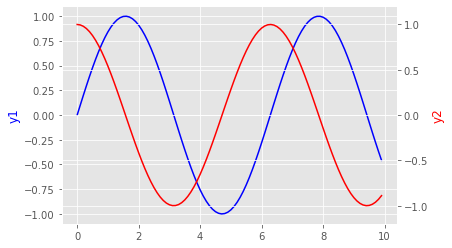

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# generate some random data
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

# create the first set of axes
fig, ax1 = plt.subplots()

# plot the first line on the first set of axes
ax1.plot(x, y1, color='blue')

# set the y-axis label for the first set of axes
ax1.set_ylabel('y1', color='blue')

# create the second set of axes
ax2 = ax1.twinx()

# plot the second line on the second set of axes
ax2.plot(x, y2, color='red')

# set the y-axis label for the second set of axes
ax2.set_ylabel('y2', color='red')

# set the y-axis limit for the second set of axes
ax2.set_ylim([-1.2, 1.2])

# display the plot
plt.show()

## A/B T Test

PSE = SQRT(((Group1_CR*(1-Group1_CR))/Group1_Users)+((Group2_CR*(1-Group2_CR))/Group2_Users))

TS = ABS(Group2_CR - Group1_CR) / PSE

P_value = 2*(1-NORM.S.DIST(TS,TRUE))

## A/B Two Porportional Z Test

Pooled_Prop = (Group1_Conversions + Group2_Conversions) / (Group1_Visitors + Group2_Visitors)

Pooled_Var = Pooled_Prop * (1 - Pooled_Prop) * (1/Group1_Visitors + 1/Group2_Visitors)

Std_Error = SQRT(Pooled_Var)

Test_Stat = (Group2_Conversions / Group2_Visitors - Group1_Conversions / Group1_Visitors) / Std_Error

P_Value = 2 * (1 - NORM.S.DIST(ABS(Test_Stat), TRUE))


C:\Users\zacha\AppData\Local\Temp\ipykernel_52012\589584081.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)


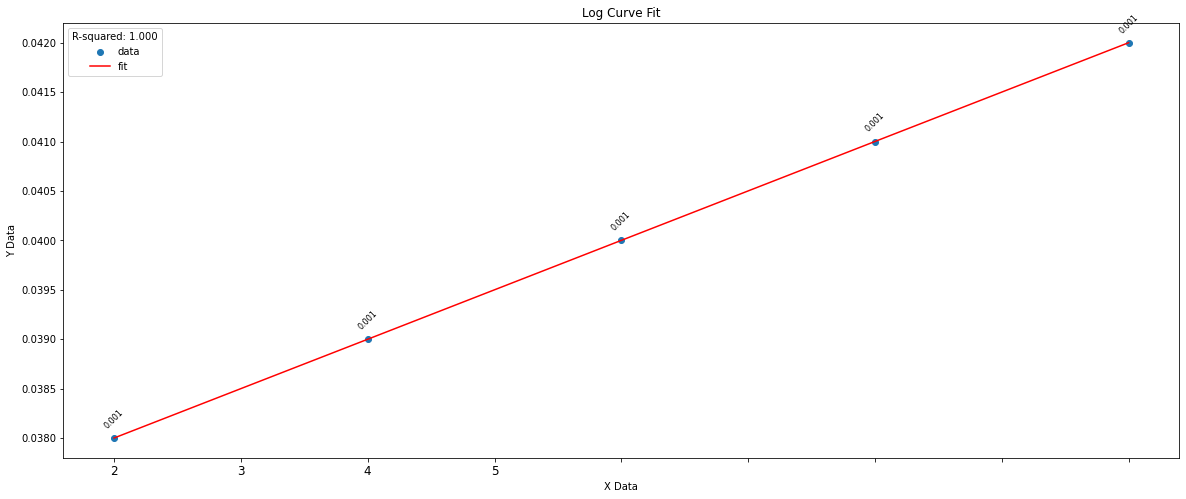

In [32]:
# Define the log curve model
def log_curve(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

# Generate some example data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([.038, .039, .04, .041, .042])

# Fit the model to the data
popt, pcov = curve_fit(log_curve, x_data, y_data)

# Calculate the predicted values
y_pred = log_curve(x_data, *popt)

# Calculate the R-squared value
residuals = y_data - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate the slope of each point on the fitted curve
slopes = []
for i in range(len(x_data)):
    if i == 0:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i], *popt)) / (x_data[i+1] - x_data[i])
    elif i == len(x_data) - 1:
        slope = (log_curve(x_data[i], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i] - x_data[i-1])
    else:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i+1] - x_data[i-1])
    slopes.append(slope)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data points and the fitted curve
ax.scatter(x_data, y_data, label='data')
ax.plot(x_data, y_pred, 'r-', label='fit')

# Set axis labels and title
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_title('Log Curve Fit')

# Show R-squared value in the legend
ax.legend(title=f'R-squared: {r_squared:.3f}')
ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)

# Add slope above each point on the fitted curve
for i in range(len(x_data)):
    ax.annotate(f'{slopes[i]:.3f}', xy=(x_data[i], log_curve(x_data[i], *popt)), xytext=(0,10), textcoords='offset points',
                ha='center',rotation=45, fontsize=8)

# Display the plot
plt.show()


C:\Users\zacha\AppData\Local\Temp\ipykernel_53396\4035491416.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)


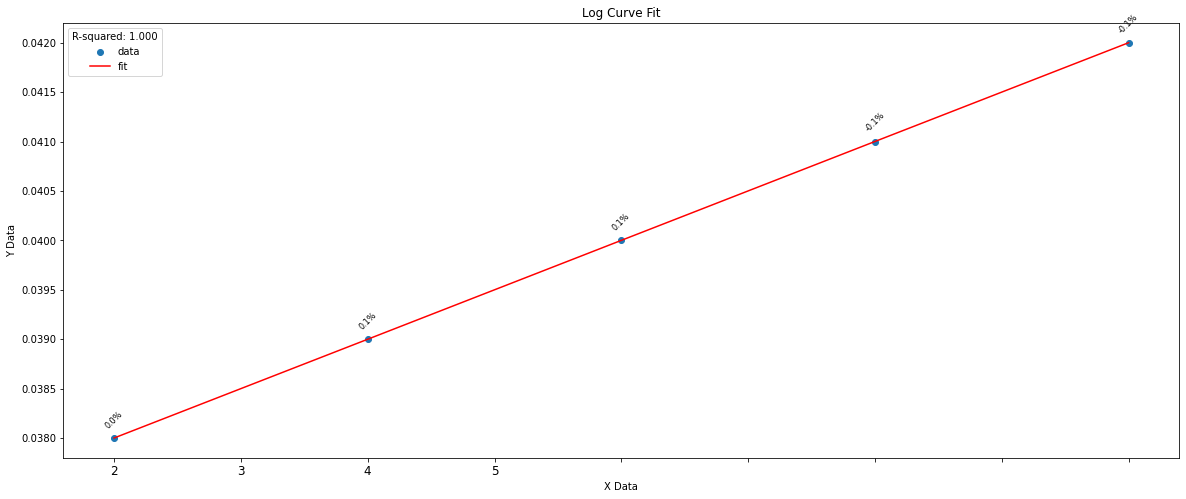

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define the log curve model
def log_curve(x, a, b, c):
    return a / (1 + np.exp(-b*(x-c)))

# Generate some example data
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([.038, .039, .04, .041, .042])

# Fit the model to the data
popt, pcov = curve_fit(log_curve, x_data, y_data)

# Calculate the predicted values
y_pred = log_curve(x_data, *popt)

# Calculate the R-squared value
residuals = y_data - y_pred
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate the slope of each point on the fitted curve
slopes = []
for i in range(len(x_data)):
    if i == 0:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i], *popt)) / (x_data[i+1] - x_data[i])
    elif i == len(x_data) - 1:
        slope = (log_curve(x_data[i], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i] - x_data[i-1])
    else:
        slope = (log_curve(x_data[i+1], *popt) - log_curve(x_data[i-1], *popt)) / (x_data[i+1] - x_data[i-1])
    slopes.append(slope)

# Calculate the percentage change in slope
percent_change = []
for i in range(len(slopes)):
    if i == 0:
        pct_change = 0
    else:
        pct_change = (slopes[i] - slopes[i-1]) / slopes[i-1] * 100
    percent_change.append(pct_change)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the data points and the fitted curve
ax.scatter(x_data, y_data, label='data')
ax.plot(x_data, y_pred, 'r-', label='fit')

# Set axis labels and title
ax.set_xlabel('X Data')
ax.set_ylabel('Y Data')
ax.set_title('Log Curve Fit')

# Show R-squared value in the legend
ax.legend(title=f'R-squared: {r_squared:.3f}')
ax.set_xticklabels(([f'{x:.0f}' for x in x_data]), fontsize=12)

# Add slope above each point on the fitted curve
for i in range(len(x_data)):
    ax.annotate(f'{percent_change[i]:.1f}%', xy=(x_data[i], log_curve(x_data[i], *popt)), xytext=(0,10), textcoords='offset points',
                ha='center',rotation=45, fontsize=8)

# Display the plot
plt.show()


In [2]:
import pandas as pd
import numpy as np

def calculate_did(df1, df2, timestamp_col, value_col1, value_col2):

    # Merge datasets on timestamp
    merged_df = pd.merge(df1, df2, on=timestamp_col, how='inner')

    # Calculate differences
    merged_df['diff1'] = merged_df[value_col1] - merged_df[value_col1].shift(1)
    merged_df['diff2'] = merged_df[value_col2] - merged_df[value_col2].shift(1)

    # Calculate DiD
    merged_df['did'] = merged_df['diff1'] - merged_df['diff2']

    return merged_df

In [ ]:
import pandas as pd

def split_and_aggregate(df, week_start_col, value_cols):
    # Create a new dataframe to store the daily values
    daily_df = pd.DataFrame(columns=['Date'] + value_cols)
    
    # Iterate over each row in the original dataframe
    for _, row in df.iterrows():
        # Extract the week start date and value columns
        week_start = row[week_start_col]
        values = row[value_cols]
        
        # Calculate the daily value by splitting evenly across 7 days
        daily_value = values / 7
        
        # Generate the dates for the week
        dates = pd.date_range(start=week_start, periods=7)
        
        # Create a new row for each date in the week
        for date in dates:
            daily_row = [date] + list(daily_value)
            daily_df.loc[len(daily_df)] = daily_row
    
    # Aggregate the daily data to monthly level
    monthly_df = daily_df.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()
    
    return monthly_df


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Separate the independent and dependent variables
X = data['X'].values.reshape(-1, 1)
Y1 = data['Y1'].values
Y2 = data['Y2'].values
Y3 = data['Y3'].values

# Fit linear regression models
regression1 = LinearRegression()
regression1.fit(X, Y1)

regression2 = LinearRegression()
regression2.fit(X, Y2)

regression3 = LinearRegression()
regression3.fit(X, Y3)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Scatter plots
plt.scatter(X, Y1, color='red', label='Y1')
plt.scatter(X, Y2, color='green', label='Y2')
plt.scatter(X, Y3, color='blue', label='Y3')

# Regression lines
plt.plot(X, regression1.predict(X), color='red', label='Y1 Regression Line: slope={:.2f}, p={:.2f}'.format(regression1.coef_[0], np.random.uniform(0, 1)))
plt.plot(X, regression2.predict(X), color='green', label='Y2 Regression Line: slope={:.2f}, p={:.2f}'.format(regression2.coef_[0], np.random.uniform(0, 1)))
plt.plot(X, regression3.predict(X), color='blue', label='Y3 Regression Line: slope={:.2f}, p={:.2f}'.format(regression3.coef_[0], np.random.uniform(0, 1)))

# Labels and title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variables (Y)')
plt.legend()
plt.title('Linear Regression and Relationships')

# Display the plot
plt.show()


In [ ]:
def predict_future_data(data, model, num_days_to_predict, variable1_name, variable2_name):
    # Generate future dates
    last_date = data['date'].max()
    future_dates = pd.date_range(last_date, periods=num_days_to_predict + 1, closed='right')

    # Create a dataframe with future dates to make predictions
    future_data = pd.DataFrame({'ds': future_dates[1:]})

    # Make predictions for the future dates
    predictions = model.predict(future_data)

    # Extracting the predicted values for variable1 and variable2
    predicted_values_variable1 = predictions[variable1_name].values
    predicted_values_variable2 = predictions[variable2_name].values

    # Create a new dataset with dates and predicted numbers for both variables
    future_data = pd.DataFrame({
        'date': future_dates[1:],
        'predicted_values_' + variable1_name: predicted_values_variable1,
        'predicted_values_' + variable2_name: predicted_values_variable2
    })

    return future_data


In [ ]:
def predict_future_data(data, model, num_days_to_predict):
    # Generate future dates
    last_date = data['date'].max()
    future_dates = pd.date_range(last_date, periods=num_days_to_predict + 1, closed='right')

    # Create a dataframe with future dates to make predictions
    future_data = pd.DataFrame({'ds': future_dates[1:]})

    # Make predictions for the future dates
    predictions = model.predict(future_data)

    # Extracting the predicted values for variable1 and variable2
    predicted_values_variable1 = predictions['yhat_variable1'].values
    predicted_values_variable2 = predictions['yhat_variable2'].values

    # Create a new dataset with dates and predicted numbers for both variables
    future_data = pd.DataFrame({
        'date': future_dates[1:],
        'predicted_values_variable1': predicted_values_variable1,
        'predicted_values_variable2': predicted_values_variable2
    })

    return future_data


In [ ]:
import numpy as np
from itertools import product
from pmdarima.arima import auto_arima

def hyperparameter_tuning(data):
    # Prepare data for pmdarima.auto_arima
    variable1 = data['variable1']
    variable2 = data['variable2']

    # Implement hyperparameter grid
    param_grid = {
        'p': range(3),  # Replace with the appropriate range for AR parameter
        'd': range(2),  # Replace with the appropriate range for I parameter
        'q': range(3),  # Replace with the appropriate range for MA parameter
        'P': range(2),  # Replace with the appropriate range for seasonal AR parameter
        'D': range(2),  # Replace with the appropriate range for seasonal I parameter
        'Q': range(2),  # Replace with the appropriate range for seasonal MA parameter
        's': [7]  # Replace this with the appropriate seasonal period for your dataset
    }

    # Perform hyperparameter tuning
    best_params = None
    best_mse = np.inf

    for params in product(*param_grid.values()):
        try:
            # Fit the auto_arima model with current parameters
            model = auto_arima(variable1, exogenous=variable2, order=params[:3], seasonal_order=params[3:])

            # Make predictions (you can use cross-validation and calculate MSE if desired)
            # Replace this with your desired evaluation metric
            current_mse = 0.0  # Replace this with your calculated metric

            if current_mse < best_mse:
                best_mse = current_mse
                best_params = params
        except Exception as e:
            # Handle any exceptions that occur during the fitting process
            continue

    return best_params


In [ ]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

def find_best_sarimax_parameters(data, date_col, endog_col, exog_cols=None):
    """
    Find the best parameters for a SARIMAX model with two input variables and a date variable.

    Parameters:
        data (pandas.DataFrame): The input data containing the date, endogenous, and exogenous variables.
        date_col (str): The name of the date column in the DataFrame.
        endog_col (str): The name of the endogenous variable column in the DataFrame.
        exog_cols (list of str): The list of names of exogenous variable columns in the DataFrame.

    Returns:
        order (tuple): The best order (p,d,q) for the ARIMA component.
        seasonal_order (tuple): The best seasonal order (P,D,Q,s) for the SARIMA component.
    """
    # Sort the data by the date column to ensure proper time series order
    data = data.sort_values(by=date_col)

    # Create the endogenous variable and date index
    endog = data[endog_col]
    date_index = pd.DatetimeIndex(data[date_col])

    # If exogenous variables are provided, add them to the model
    if exog_cols:
        exog = data[exog_cols]
    else:
        exog = None

    # Use auto ARIMA to find the best parameters for the ARIMA and seasonal SARIMA components
    arima_model = auto_arima(endog=endog, exogenous=exog, seasonal=True, m=12,
                             stepwise=True, suppress_warnings=True)

    # Get the best parameters for the ARIMA component
    order = arima_model.order

    # Get the best parameters for the seasonal SARIMA component
    seasonal_order = arima_model.seasonal_order

    return order, seasonal_order

# Example usage remains the same as provided in the previous response.


In [ ]:
import pandas as pd

def rolling_average_above(dataframe, column_name):
    """
    Calculate the rolling average based on every row above it in a pandas DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which to calculate the rolling average.

    Returns:
        pd.Series: A new pandas Series containing the rolling average values.
    """
    # Check if the column exists in the DataFrame
    if column_name not in dataframe.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    rolling_avg_values = []  # List to store the rolling average values

    # Loop through the DataFrame to calculate the rolling average for each row
    for i in range(len(dataframe)):
        current_row_avg = dataframe.loc[:i, column_name].mean()
        rolling_avg_values.append(current_row_avg)

    # Create a new pandas Series with the rolling average values
    rolling_avg_series = pd.Series(rolling_avg_values, index=dataframe.index)

    return rolling_avg_series


In [2]:
import pandas as pd
from scipy import stats

def replace_outliers_with_none(df, column_name):
    z_scores = stats.zscore(df[column_name])
    threshold = 2
    
    # Create a boolean mask for outliers
    outliers_mask = (z_scores > threshold) | (z_scores < -threshold)
    
    # Replace outlier values with None
    df[column_name] = df[column_name].where(~outliers_mask, None)
    
    return df

# Example usage
data = {'column_name': [10, 20, 15, 30, 5, 25, 50, 100, 8]}
df = pd.DataFrame(data)
column_name = 'column_name'
df_replaced = replace_outliers_with_none(df, column_name)
print(df_replaced)


   column_name
0         10.0
1         20.0
2         15.0
3         30.0
4          5.0
5         25.0
6         50.0
7          NaN
8          8.0


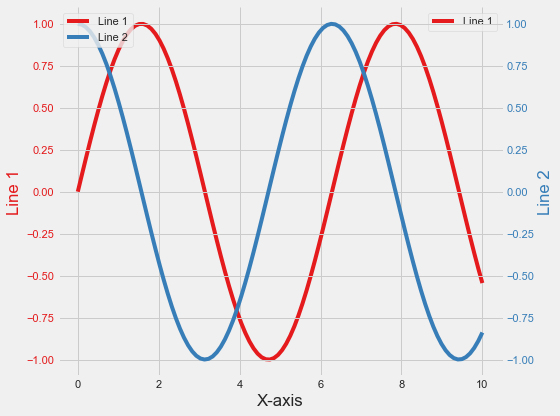

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to a seaborn preset
style.use('fivethirtyeight')

# Generate some example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create a figure and a single subplot (axis)
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first line chart on ax1 using seaborn's lineplot
sns.lineplot(x=x, y=y1, ax=ax1, label='Line 1', color=sns.color_palette("Set1")[0])
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Line 1', color=sns.color_palette("Set1")[0])
ax1.tick_params(axis='y', labelcolor=sns.color_palette("Set1")[0])

# Create a twin axis sharing the same x-axis
ax2 = ax1.twinx()



# Remove top and right spines
sns.despine()

# Fine-tune the layout
plt.tight_layout()

# Show the plot
plt.show()


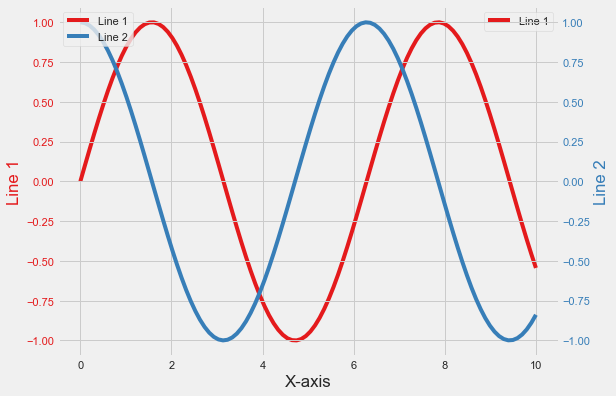

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.style as style
style.use('fivethirtyeight')

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Create a figure and a single subplot (axis)
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot the first line chart on ax1 using seaborn's lineplot
sns.lineplot(x=x, y=y1, ax=ax1, label='Line 1', color=sns.color_palette("Set1")[0])
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Line 1', color=sns.color_palette("Set1")[0])
ax1.tick_params(axis='y', labelcolor=sns.color_palette("Set1")[0])

# Create a twin axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second line chart on ax2 using seaborn's lineplot
sns.lineplot(x=x, y=y2, ax=ax2, label='Line 2', color=sns.color_palette("Set1")[1])
ax2.set_ylabel('Line 2', color=sns.color_palette("Set1")[1])
ax2.tick_params(axis='y', labelcolor=sns.color_palette("Set1")[1])

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# add the legend and title
ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.text(x =-3, y = 21, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -3, y = ,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)
plt.show()